In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# criando dataframe
# df_lept_2018 = pd.read_csv("Leptospirose_2018.csv")
df_raiva_2021 = pd.read_csv("Raiva_Humana_2021.csv")

In [3]:
def decodifica_estados(df):
    
    # dicionario com as siglas dos estados para decodificação
    dicionario_estados = {12: 'AC', 27: 'AL', 16: 'AP', 13: 'AM', 29: 'BA', 23: 'CE', 53: 'DF', 32: 'ES', 52: 'GO', 21: 'MA', 51: 'MT', 50: 'MS', 31: 'MG', 15: 'PA', 25: 'PB', 41: 'PR', 26: 'PE', 22: 'PI', 24: 'RN', 43: 'RS', 33: 'RJ', 11: 'RO', 14: 'RR', 42: 'SC', 35: 'SP', 28: 'SE', 17: 'TO'}
    # mudando os indices da series para as siglas dos estados
    df.rename(index = dicionario_estados, inplace = True)

    print(df)

    return df

In [ ]:
# 1. Quantos registros existem no arquivo de dados?

In [ ]:
# 2. Quantos registros existem por município? a função deve retornar uma série do pandas (pd.Series)

In [ ]:
# 3. Qual sexo possui mais registros? Retorne uma tupla com o sexo mais numeroso e um dicionário tendo como chaves 'M' e 'F' para os sexos con a contagem de registros em cada sexo.

In [ ]:
# 4. Qual a idade média (em anos) dos registros? retorne um float

In [ ]:
# 5. a coluna SG_UF_NOT contém a sigla (string, por exemplo 33: 'RJ') da unidade federativa. Qual a unidade federativa com mais registros? Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a quantidade de registros.

In [ ]:
# 6. Novamente usando a coluna SG_UF_NOT, qual a unidade federativa com mais registros de pessoas do sexo masculino? Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a quantidade de registros.

In [10]:
# 7. Descubra quantos municípios existem em cada unidade federativa (UF) (busque no google). determine, para a sua tabela de dados, que proporção dos munícípios de cada UF, tem pelo menos um registro. Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a proporção de municípios com pelo menos um registro.
df_contagem_estados = df_raiva_2021.groupby(["SG_UF_NOT"])["ID_MUNICIP"].nunique()
display(df_contagem_estados)

SG_UF_NOT
11     1
15     1
16     1
17     1
21     3
22     8
24     5
26     2
29     1
31    21
33     6
35    14
41     3
42     5
43     3
50     2
51     7
52     9
53     1
Name: ID_MUNICIP, dtype: int64

In [ ]:
# 8. Usando o comando pd.to_datetime do Pandas, crie uma nova coluna chamada DT_NOTIFICACAO com o tipo datetime64[ns] a partir da coluna DT_NOTIFIC, e uma coluna DT_SINTOMAS também de tipo datetime64[ns]. A partir destas duas novas colunas calcule o número de dias de atraso entre os sintomas e a notificação e salve em uma coluna ATRASO_NOT.

In [ ]:
# 9. Calcule a média e desvio padrão do atraso de notificação por unidade federativa. Retorne o resultado como um dicionário tendo como chaves as siglas das unidades federativas e a média e desvio padrão do atraso de notificação.

ID_MUNICIP
110160     0.000000
150140     0.000000
160010     0.000000
171620     0.000000
210320     3.000000
            ...    
522140     3.000000
522170    28.000000
522190     1.000000
522205     0.666667
530010     1.000000
Name: ATRASO_NOT, Length: 94, dtype: float64

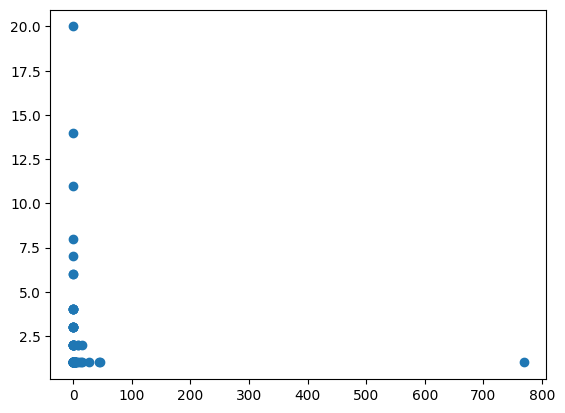

In [14]:
# 10. Calcule a média do atraso de notificação por município. Plote o número de notificações contra o atraso médio em cada município como um scatter plot.
  
df = df_raiva_2021

df["data_notificacao"] = pd.to_datetime(df["DT_NOTIFIC"])
df["data_sintomas"] = pd.to_datetime(df["DT_SIN_PRI"])
df["ATRASO_NOT"] = (df["data_notificacao"] - df["data_sintomas"]) / np.timedelta64(1, "D")
    
# criando dataframe com municipios e a media para cada um
df_atraso_municipio = pd.DataFrame(df.groupby(["ID_MUNICIP"])["ATRASO_NOT"].mean())

# adicionando coluna com o numero de notificacoes no dataframe
df_atraso_municipio["n_notificacoes"] = df.groupby(["ID_MUNICIP"])["ID_AGRAVO"].count()

# fazendo gráfico
fig, plot_municipios = plt.subplots()

# plotando valores
plot_municipios.scatter(df_atraso_municipio["ATRASO_NOT"], df_atraso_municipio["n_notificacoes"] )
    
df_atraso_municipio["ATRASO_NOT"]